In [34]:
import os
import ast
import shutil
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.image as img
from ultralytics import YOLO

%matplotlib inline

In [2]:
ROOT_PATH = Path(os.getcwd()).parent.as_posix()
DATASET_PATH = Path(ROOT_PATH, "datasets/storm-damage-detection/working/sdd/sdd.yaml").as_posix()
RUN_PATH = Path(ROOT_PATH, "runs").as_posix()
PRETRAINED_PATH = Path(ROOT_PATH, "pretrained").as_posix()
TEST_INPUTS_DIR = Path(ROOT_PATH, "datasets/storm-damage-detection/working/sdd/test/images").as_posix()

## Training

In [3]:
model_name = "yolov8n.pt" # yolov8n.pt yolov8s.pt yolov8m.pt yolov8l.pt yolov8x.pt
model = YOLO(model_name, task="detect")
model.info()

YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs


(225, 3157200, 0, 8.8575488)

In [4]:
train_results = model.train(
    data=DATASET_PATH, 
    epochs=1000, 
    imgsz=512,
    project=RUN_PATH
)

Ultralytics YOLOv8.1.24 🚀 Python-3.12.2 torch-2.2.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:/Users/Jia Herng/Documents/Jia Herng Docs/projects/storm-damage-detection/datasets/storm-damage-detection/working/sdd/sdd.yaml, epochs=1000, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=C:/Users/Jia Herng/Documents/Jia Herng Docs/projects/storm-damage-detection/runs, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, au

train: Scanning C:\Users\Jia Herng\Documents\Jia Herng Docs\projects\storm-damage-detection\datasets\storm-damage-detection\working\sdd\t

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 34, len(boxes) = 2746. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning C:\Users\Jia Herng\Documents\Jia Herng Docs\projects\storm-damage-detection\datasets\storm-damage-detection\working\sdd\val


Plotting labels to C:\Users\Jia Herng\Documents\Jia Herng Docs\projects\storm-damage-detection\runs\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 8 dataloader workers
Logging results to C:\Users\Jia Herng\Documents\Jia Herng Docs\projects\storm-damage-detection\runs\train4
Starting training for 1000 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     1/1000      1.84G      1.812      4.138      1.608        285        512: 100%|██████████| 9/9 [00:04<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         18        419    0.00212      0.101     0.0168     0.0125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     2/1000      1.73G      1.539      3.633       1.37        382        512: 100%|██████████| 9/9 [00:01<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.33it/s]

                   all         18        419    0.00379     0.0952     0.0103    0.00538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     3/1000      1.59G      1.374      2.674      1.225        322        512: 100%|██████████| 9/9 [00:01<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.89it/s]

                   all         18        419     0.0414      0.398      0.166      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     4/1000      1.77G      1.405       2.14        1.2        609        512: 100%|██████████| 9/9 [00:01<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.77it/s]

                   all         18        419      0.731      0.179      0.202      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     5/1000      1.59G      1.388      1.908      1.197        405        512: 100%|██████████| 9/9 [00:01<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]

                   all         18        419      0.675      0.207      0.212      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     6/1000      2.23G      1.391      1.759      1.194        532        512: 100%|██████████| 9/9 [00:01<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]

                   all         18        419      0.693      0.222      0.237      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     7/1000      1.62G      1.366       1.72      1.181        476        512: 100%|██████████| 9/9 [00:01<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.87it/s]

                   all         18        419      0.425      0.238      0.238      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     8/1000      1.58G      1.294      1.578       1.12        483        512: 100%|██████████| 9/9 [00:01<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]

                   all         18        419      0.729      0.216      0.245      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     9/1000       1.6G      1.247      1.477      1.117        332        512: 100%|██████████| 9/9 [00:01<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.96it/s]

                   all         18        419      0.692      0.274      0.263      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    10/1000      1.58G      1.344      1.567      1.159        427        512: 100%|██████████| 9/9 [00:01<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]

                   all         18        419      0.717      0.254      0.262      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    11/1000      1.74G       1.32      1.429      1.169        584        512: 100%|██████████| 9/9 [00:01<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.61it/s]

                   all         18        419      0.474      0.346      0.272       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    12/1000      1.91G      1.406      1.505      1.199        233        512: 100%|██████████| 9/9 [00:01<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.93it/s]

                   all         18        419      0.514       0.29      0.259      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    13/1000      1.72G       1.29      1.392       1.14        348        512: 100%|██████████| 9/9 [00:01<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.55it/s]

                   all         18        419      0.485      0.301      0.267      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    14/1000      1.76G      1.258      1.398      1.142        418        512: 100%|██████████| 9/9 [00:01<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.50it/s]

                   all         18        419      0.472       0.32      0.246      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    15/1000       1.8G      1.238      1.408      1.121        449        512: 100%|██████████| 9/9 [00:01<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]

                   all         18        419      0.508      0.309      0.256      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    16/1000      1.76G      1.299      1.425      1.154        380        512: 100%|██████████| 9/9 [00:01<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]

                   all         18        419      0.489      0.341      0.263      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    17/1000      1.56G      1.249      1.462      1.149        461        512: 100%|██████████| 9/9 [00:00<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all         18        419      0.524      0.383      0.278      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    18/1000      1.84G      1.204      1.392      1.129        279        512: 100%|██████████| 9/9 [00:01<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.66it/s]

                   all         18        419      0.517      0.415       0.28      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    19/1000      1.76G      1.209       1.31      1.123        415        512: 100%|██████████| 9/9 [00:01<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]

                   all         18        419      0.479      0.466      0.291      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    20/1000      1.72G      1.201      1.243      1.101        382        512: 100%|██████████| 9/9 [00:01<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]

                   all         18        419      0.742      0.345      0.295       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    21/1000      1.73G      1.203      1.361      1.108        433        512: 100%|██████████| 9/9 [00:00<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.87it/s]

                   all         18        419      0.562      0.395       0.31       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    22/1000       1.6G        1.2      1.314      1.101        393        512: 100%|██████████| 9/9 [00:01<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.12it/s]

                   all         18        419      0.469      0.419      0.281      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    23/1000      1.77G      1.157      1.225      1.093        426        512: 100%|██████████| 9/9 [00:01<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.95it/s]

                   all         18        419      0.754      0.327      0.297      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    24/1000      1.92G      1.177      1.259       1.11        415        512: 100%|██████████| 9/9 [00:01<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]

                   all         18        419      0.487      0.296      0.307      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    25/1000      1.73G      1.143      1.221      1.122        414        512: 100%|██████████| 9/9 [00:01<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]

                   all         18        419      0.228      0.478      0.291      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    26/1000      1.88G      1.188      1.223      1.111        348        512: 100%|██████████| 9/9 [00:01<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.21it/s]

                   all         18        419      0.261      0.476      0.286      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    27/1000       1.7G      1.199      1.186      1.107        422        512: 100%|██████████| 9/9 [00:01<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.58it/s]

                   all         18        419       0.29      0.458      0.289       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    28/1000      1.72G      1.133      1.166      1.077        422        512: 100%|██████████| 9/9 [00:01<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]

                   all         18        419      0.281      0.407      0.329      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    29/1000      1.72G      1.097      1.141      1.079        498        512: 100%|██████████| 9/9 [00:01<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.73it/s]

                   all         18        419      0.516      0.397      0.337      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    30/1000      1.93G      1.171      1.171      1.086        602        512: 100%|██████████| 9/9 [00:01<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.09it/s]

                   all         18        419      0.295       0.34      0.323      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    31/1000      1.61G      1.129      1.113      1.097        475        512: 100%|██████████| 9/9 [00:00<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]


                   all         18        419      0.319      0.325      0.335      0.229

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    32/1000      1.56G      1.183      1.162      1.114        410        512: 100%|██████████| 9/9 [00:01<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.16it/s]

                   all         18        419      0.291      0.511      0.345      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    33/1000      1.57G      1.067      1.154      1.075        316        512: 100%|██████████| 9/9 [00:01<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.38it/s]

                   all         18        419      0.295      0.539      0.365       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    34/1000      1.61G      1.086      1.077      1.072        441        512: 100%|██████████| 9/9 [00:01<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.16it/s]

                   all         18        419      0.404      0.432      0.348      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    35/1000      1.74G      1.133      1.129      1.092        493        512: 100%|██████████| 9/9 [00:01<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]

                   all         18        419      0.368      0.413      0.365      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    36/1000      1.71G      1.159      1.185      1.115        619        512: 100%|██████████| 9/9 [00:01<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.84it/s]

                   all         18        419      0.278      0.476      0.281      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    37/1000      1.91G      1.122      1.116      1.082        384        512: 100%|██████████| 9/9 [00:01<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.73it/s]

                   all         18        419       0.63      0.354      0.339      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    38/1000       1.8G      1.085      1.095      1.078        362        512: 100%|██████████| 9/9 [00:01<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.36it/s]

                   all         18        419      0.296      0.562      0.378      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    39/1000      1.72G      1.117      1.135      1.091        254        512: 100%|██████████| 9/9 [00:01<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.81it/s]

                   all         18        419      0.498      0.406      0.386      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    40/1000      1.75G      1.124      1.105      1.073        463        512: 100%|██████████| 9/9 [00:01<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.68it/s]

                   all         18        419      0.272      0.562      0.368       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    41/1000      1.88G      1.125      1.081      1.083        449        512: 100%|██████████| 9/9 [00:01<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.12it/s]

                   all         18        419      0.335      0.536      0.394      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    42/1000      1.78G      1.113      1.085      1.083        290        512: 100%|██████████| 9/9 [00:01<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]

                   all         18        419      0.319      0.514      0.327      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    43/1000      1.77G      1.111      1.091      1.082        325        512: 100%|██████████| 9/9 [00:01<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.31it/s]

                   all         18        419      0.335      0.455      0.304      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    44/1000      1.71G      1.106      1.079      1.082        576        512: 100%|██████████| 9/9 [00:01<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.43it/s]

                   all         18        419      0.286      0.483      0.314      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    45/1000      1.73G      1.122      1.072        1.1        483        512: 100%|██████████| 9/9 [00:00<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.09it/s]

                   all         18        419      0.349      0.411      0.344      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    46/1000      2.07G      1.098      1.003      1.083        593        512: 100%|██████████| 9/9 [00:01<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.74it/s]

                   all         18        419      0.324       0.56       0.37      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    47/1000      1.87G      1.086      1.015      1.058        536        512: 100%|██████████| 9/9 [00:01<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all         18        419      0.397      0.526      0.431      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    48/1000      1.88G      1.124      1.036      1.098        483        512: 100%|██████████| 9/9 [00:01<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.69it/s]

                   all         18        419      0.382       0.59      0.413      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    49/1000      2.07G      1.093      1.047      1.082        421        512: 100%|██████████| 9/9 [00:01<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.83it/s]

                   all         18        419      0.285       0.63      0.355      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    50/1000      1.56G       1.09      1.053      1.081        311        512: 100%|██████████| 9/9 [00:01<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.37it/s]

                   all         18        419      0.316      0.571      0.365      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    51/1000      1.65G      1.091      1.005      1.081        406        512: 100%|██████████| 9/9 [00:01<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.53it/s]

                   all         18        419      0.633      0.416      0.398      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    52/1000      1.77G      1.106     0.9978      1.081        296        512: 100%|██████████| 9/9 [00:01<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.88it/s]

                   all         18        419      0.306      0.595      0.395      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    53/1000      1.92G      1.054       0.97      1.053        425        512: 100%|██████████| 9/9 [00:01<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.01it/s]

                   all         18        419      0.343      0.611      0.396      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    54/1000      1.75G      1.038     0.9773      1.046        336        512: 100%|██████████| 9/9 [00:01<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all         18        419      0.548        0.4      0.448      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    55/1000      2.04G      1.033     0.9506      1.045        313        512: 100%|██████████| 9/9 [00:01<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.55it/s]

                   all         18        419      0.455      0.478      0.457      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    56/1000      1.94G      1.073     0.9706      1.066        453        512: 100%|██████████| 9/9 [00:01<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]

                   all         18        419      0.331      0.538      0.431      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    57/1000      1.61G      1.077     0.9802      1.067        344        512: 100%|██████████| 9/9 [00:01<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.69it/s]

                   all         18        419      0.362      0.431       0.41      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    58/1000      1.72G      1.097     0.9905      1.065        503        512: 100%|██████████| 9/9 [00:01<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.33it/s]

                   all         18        419      0.318      0.528      0.356      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    59/1000      1.56G      1.078     0.9831      1.075        419        512: 100%|██████████| 9/9 [00:01<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]

                   all         18        419      0.316      0.674      0.357       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    60/1000      1.74G      1.048     0.9475      1.052        364        512: 100%|██████████| 9/9 [00:01<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.70it/s]

                   all         18        419      0.439      0.494      0.403      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    61/1000      1.56G      1.051     0.9559      1.058        439        512: 100%|██████████| 9/9 [00:01<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]

                   all         18        419       0.37      0.576       0.39      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    62/1000      1.89G      1.089     0.9743      1.065        656        512: 100%|██████████| 9/9 [00:01<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]

                   all         18        419      0.357      0.606      0.408      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    63/1000      1.62G      1.029     0.9095      1.033        450        512: 100%|██████████| 9/9 [00:01<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]

                   all         18        419      0.401      0.595      0.421      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    64/1000      1.58G      1.009     0.9153      1.052        505        512: 100%|██████████| 9/9 [00:01<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.42it/s]

                   all         18        419      0.418      0.495      0.385      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    65/1000      1.88G      1.055     0.9328      1.035        357        512: 100%|██████████| 9/9 [00:01<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.42it/s]

                   all         18        419      0.431      0.393      0.364      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    66/1000      1.69G      1.052     0.9247      1.061        473        512: 100%|██████████| 9/9 [00:01<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.50it/s]

                   all         18        419      0.415       0.43      0.386      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    67/1000      1.93G       1.05     0.9486      1.052        409        512: 100%|██████████| 9/9 [00:01<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.46it/s]

                   all         18        419      0.365      0.524      0.383      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    68/1000      1.77G      1.047     0.9139      1.064        471        512: 100%|██████████| 9/9 [00:01<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.53it/s]

                   all         18        419      0.409       0.47      0.439      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    69/1000      1.76G      1.021     0.9018      1.048        493        512: 100%|██████████| 9/9 [00:01<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.53it/s]

                   all         18        419      0.528      0.444      0.429      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    70/1000      1.59G      1.035     0.9106      1.046        480        512: 100%|██████████| 9/9 [00:01<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.66it/s]

                   all         18        419      0.406       0.42      0.363      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    71/1000      1.57G     0.9886     0.9089      1.027        333        512: 100%|██████████| 9/9 [00:01<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.55it/s]

                   all         18        419      0.425      0.437      0.381      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    72/1000      1.76G      1.028     0.9176      1.057        309        512: 100%|██████████| 9/9 [00:01<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]

                   all         18        419       0.38      0.501      0.382      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    73/1000      1.56G      1.031     0.8993      1.042        397        512: 100%|██████████| 9/9 [00:01<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.98it/s]

                   all         18        419      0.553      0.394      0.386      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    74/1000      1.76G      1.005     0.9171       1.04        303        512: 100%|██████████| 9/9 [00:01<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.30it/s]

                   all         18        419      0.502      0.473      0.439      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    75/1000      1.58G      1.066     0.9005      1.057        352        512: 100%|██████████| 9/9 [00:01<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.61it/s]

                   all         18        419      0.303      0.562      0.388      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    76/1000      1.61G       1.04     0.8889      1.032        379        512: 100%|██████████| 9/9 [00:01<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.80it/s]

                   all         18        419      0.373      0.424      0.399      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    77/1000      1.75G     0.9846     0.8715       1.03        371        512: 100%|██████████| 9/9 [00:01<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.34it/s]

                   all         18        419      0.355      0.458      0.404      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    78/1000      1.79G     0.9971     0.9336      1.042        300        512: 100%|██████████| 9/9 [00:01<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.13it/s]

                   all         18        419      0.398      0.564      0.409      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    79/1000      1.69G      1.017      0.877      1.039        503        512: 100%|██████████| 9/9 [00:01<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.33it/s]

                   all         18        419      0.343      0.666      0.415      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    80/1000      1.89G      1.058      0.886      1.061        508        512: 100%|██████████| 9/9 [00:01<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.81it/s]

                   all         18        419      0.454      0.462      0.428      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    81/1000      1.71G      1.009     0.8579      1.044        406        512: 100%|██████████| 9/9 [00:01<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.28it/s]

                   all         18        419      0.444      0.496      0.456      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    82/1000      1.57G     0.9961     0.8287       1.03        390        512: 100%|██████████| 9/9 [00:01<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.35it/s]

                   all         18        419      0.387      0.565      0.426        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    83/1000      1.57G      1.018      0.861      1.031        351        512: 100%|██████████| 9/9 [00:01<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.59it/s]

                   all         18        419      0.385      0.547      0.427      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    84/1000      1.58G      1.013     0.8507      1.039        376        512: 100%|██████████| 9/9 [00:01<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.76it/s]

                   all         18        419      0.476      0.403      0.398      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    85/1000      1.88G      1.028     0.8324      1.046        350        512: 100%|██████████| 9/9 [00:01<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all         18        419      0.454      0.396      0.395      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    86/1000      1.58G      1.017     0.8673      1.026        479        512: 100%|██████████| 9/9 [00:01<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.86it/s]

                   all         18        419      0.328       0.51      0.392      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    87/1000      1.78G     0.9884     0.8343      1.032        480        512: 100%|██████████| 9/9 [00:01<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.54it/s]

                   all         18        419      0.409      0.382      0.359      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    88/1000      1.92G      1.034     0.8715      1.047        656        512: 100%|██████████| 9/9 [00:01<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.89it/s]

                   all         18        419      0.373      0.473      0.378      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    89/1000      1.55G      1.003     0.8261      1.023        404        512: 100%|██████████| 9/9 [00:01<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.21it/s]

                   all         18        419      0.417       0.53      0.388       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    90/1000      1.56G      1.017     0.9141      1.051        362        512: 100%|██████████| 9/9 [00:01<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.75it/s]

                   all         18        419      0.337        0.5      0.321      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    91/1000      1.78G       1.02     0.8662      1.044        587        512: 100%|██████████| 9/9 [00:01<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.75it/s]

                   all         18        419      0.328      0.517      0.349      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    92/1000      1.75G     0.9946     0.8563       1.03        386        512: 100%|██████████| 9/9 [00:01<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.86it/s]

                   all         18        419      0.407      0.473      0.394      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    93/1000      1.76G      1.015     0.8252      1.041        469        512: 100%|██████████| 9/9 [00:01<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.02it/s]

                   all         18        419      0.365      0.447      0.379      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    94/1000      1.72G      1.013     0.8536      1.038        662        512: 100%|██████████| 9/9 [00:01<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.43it/s]

                   all         18        419      0.302      0.519      0.381      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    95/1000      1.75G     0.9837      0.818      1.021        422        512: 100%|██████████| 9/9 [00:01<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.34it/s]

                   all         18        419      0.367        0.4      0.382      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    96/1000      1.58G     0.9922     0.8544      1.027        395        512: 100%|██████████| 9/9 [00:01<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.34it/s]

                   all         18        419      0.376      0.404      0.395      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    97/1000      1.77G     0.9488     0.7993      1.008        306        512: 100%|██████████| 9/9 [00:01<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.60it/s]

                   all         18        419       0.36       0.62      0.417      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    98/1000      1.74G      0.976     0.8126      1.017        294        512: 100%|██████████| 9/9 [00:00<00:00,  9.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.37it/s]

                   all         18        419      0.421      0.553      0.417      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    99/1000      1.76G      1.001     0.7967      1.023        567        512: 100%|██████████| 9/9 [00:01<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.38it/s]

                   all         18        419      0.468      0.594      0.445      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   100/1000      1.69G      1.013     0.8507      1.032        638        512: 100%|██████████| 9/9 [00:01<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.25it/s]

                   all         18        419        0.4      0.511      0.409      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   101/1000       1.6G      1.003     0.8443      1.037        401        512: 100%|██████████| 9/9 [00:01<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.76it/s]

                   all         18        419      0.322      0.482      0.354      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   102/1000      1.58G       1.03     0.8515      1.046        369        512: 100%|██████████| 9/9 [00:01<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.25it/s]

                   all         18        419      0.266      0.524      0.351       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   103/1000      1.75G     0.9852     0.8727      1.039        383        512: 100%|██████████| 9/9 [00:01<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.43it/s]

                   all         18        419       0.31      0.513      0.375      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   104/1000      1.58G     0.9683     0.8039      1.008        487        512: 100%|██████████| 9/9 [00:01<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.63it/s]

                   all         18        419      0.345      0.389      0.366      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   105/1000      1.88G     0.9804     0.8042      1.012        821        512: 100%|██████████| 9/9 [00:01<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.33it/s]

                   all         18        419      0.304      0.456      0.336      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   106/1000      1.56G     0.9853     0.8126      1.035        418        512: 100%|██████████| 9/9 [00:01<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.87it/s]

                   all         18        419      0.377      0.346      0.348      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   107/1000       1.7G     0.9531     0.7947      1.026        437        512: 100%|██████████| 9/9 [00:01<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.57it/s]

                   all         18        419      0.628      0.343      0.356      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   108/1000      1.76G     0.9449     0.7775      1.005        433        512: 100%|██████████| 9/9 [00:01<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.21it/s]

                   all         18        419       0.32      0.466      0.376      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   109/1000       1.6G     0.9588      0.785      1.021        282        512: 100%|██████████| 9/9 [00:00<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.04it/s]

                   all         18        419      0.302      0.588      0.344      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   110/1000       1.8G     0.9586     0.8203      1.006        522        512: 100%|██████████| 9/9 [00:01<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.98it/s]

                   all         18        419      0.325      0.448      0.329      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   111/1000      1.74G     0.9623     0.7741      1.022        442        512: 100%|██████████| 9/9 [00:01<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.33it/s]

                   all         18        419      0.315      0.481      0.365      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   112/1000      1.77G      0.985     0.8048      1.024        547        512: 100%|██████████| 9/9 [00:01<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.62it/s]

                   all         18        419      0.326      0.486      0.375      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   113/1000      1.73G      0.998     0.8275      1.023        387        512: 100%|██████████| 9/9 [00:01<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.50it/s]

                   all         18        419      0.355      0.441      0.375      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   114/1000       1.6G     0.9189     0.7614      1.008        392        512: 100%|██████████| 9/9 [00:01<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.61it/s]

                   all         18        419      0.378      0.396      0.352      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   115/1000      1.93G     0.9859     0.7712      1.013        313        512: 100%|██████████| 9/9 [00:01<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]

                   all         18        419      0.434      0.327      0.364      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   116/1000      1.85G     0.9543     0.7479      1.001        440        512: 100%|██████████| 9/9 [00:01<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.18it/s]

                   all         18        419      0.425      0.639      0.448      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   117/1000      1.74G     0.9542     0.7673      1.013        317        512: 100%|██████████| 9/9 [00:01<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.53it/s]

                   all         18        419       0.43      0.578      0.421      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   118/1000      1.73G      0.959     0.7658      1.027        343        512: 100%|██████████| 9/9 [00:01<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.28it/s]

                   all         18        419      0.341      0.598      0.393       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   119/1000      1.76G     0.9407     0.7396      1.009        346        512: 100%|██████████| 9/9 [00:01<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]

                   all         18        419      0.328      0.669      0.384      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   120/1000      1.77G     0.9863     0.7986       1.03        335        512: 100%|██████████| 9/9 [00:01<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.93it/s]

                   all         18        419      0.531      0.415      0.388      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   121/1000      1.87G      0.997     0.7973       1.02        470        512: 100%|██████████| 9/9 [00:01<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.57it/s]

                   all         18        419      0.483      0.505      0.348      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   122/1000      2.27G     0.9581     0.7561          1        494        512: 100%|██████████| 9/9 [00:01<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.58it/s]

                   all         18        419      0.343      0.506      0.337      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   123/1000      1.55G     0.9197     0.7489      1.005        351        512: 100%|██████████| 9/9 [00:01<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.46it/s]

                   all         18        419      0.369      0.485      0.336      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   124/1000      1.74G     0.9681     0.7467       1.02        402        512: 100%|██████████| 9/9 [00:01<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.33it/s]

                   all         18        419      0.354      0.487      0.362      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   125/1000         2G     0.9833     0.7799      1.005        366        512: 100%|██████████| 9/9 [00:01<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.64it/s]

                   all         18        419      0.351       0.48      0.387       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   126/1000      1.89G      0.924     0.7117     0.9801        526        512: 100%|██████████| 9/9 [00:01<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.49it/s]

                   all         18        419      0.415      0.417      0.386      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   127/1000      1.77G     0.9626     0.7632      1.021        422        512: 100%|██████████| 9/9 [00:01<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.84it/s]

                   all         18        419      0.425      0.451       0.41      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   128/1000      1.76G     0.9089     0.7395     0.9968        497        512: 100%|██████████| 9/9 [00:01<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.05it/s]

                   all         18        419      0.433      0.422      0.407      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   129/1000      1.91G     0.9639       0.76      1.028        382        512: 100%|██████████| 9/9 [00:01<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.70it/s]

                   all         18        419      0.343      0.529      0.391      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   130/1000      1.73G     0.9279     0.7377      1.002        518        512: 100%|██████████| 9/9 [00:01<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.77it/s]

                   all         18        419      0.383      0.478      0.393      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   131/1000      1.74G     0.9436     0.7463      1.002        428        512: 100%|██████████| 9/9 [00:01<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.46it/s]

                   all         18        419      0.408      0.466       0.39      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   132/1000      1.89G     0.9528     0.7551      1.011        437        512: 100%|██████████| 9/9 [00:01<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]

                   all         18        419      0.346      0.558      0.361      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   133/1000      1.91G     0.9692     0.7352      1.014        386        512: 100%|██████████| 9/9 [00:01<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.19it/s]

                   all         18        419      0.344      0.503      0.371      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   134/1000      1.59G     0.9589     0.7401      1.005        415        512: 100%|██████████| 9/9 [00:01<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.13it/s]

                   all         18        419      0.338      0.505      0.385      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   135/1000       1.9G     0.9304     0.7007     0.9955        436        512: 100%|██████████| 9/9 [00:01<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]

                   all         18        419      0.396      0.497       0.38      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   136/1000      1.98G     0.9494     0.7571      1.002        375        512: 100%|██████████| 9/9 [00:01<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.31it/s]

                   all         18        419      0.367      0.446       0.37       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   137/1000       1.7G     0.9217     0.7404          1        314        512: 100%|██████████| 9/9 [00:01<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all         18        419       0.37      0.489      0.398      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   138/1000      1.91G     0.9407     0.7366      1.009        407        512: 100%|██████████| 9/9 [00:01<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.81it/s]

                   all         18        419      0.431      0.421       0.39      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   139/1000      1.57G     0.9528     0.7516      1.017        347        512: 100%|██████████| 9/9 [00:01<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.69it/s]

                   all         18        419      0.454      0.425      0.386      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   140/1000      1.59G     0.9588     0.7331      1.013        438        512: 100%|██████████| 9/9 [00:01<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.55it/s]

                   all         18        419       0.41      0.439      0.384      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   141/1000      1.89G     0.9554     0.7425      1.022        389        512: 100%|██████████| 9/9 [00:01<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.87it/s]

                   all         18        419      0.471      0.349      0.375      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   142/1000       1.7G     0.9564     0.7272      1.002        425        512: 100%|██████████| 9/9 [00:01<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.13it/s]

                   all         18        419      0.351      0.444      0.331      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   143/1000      1.74G     0.9591     0.7419       1.01        354        512: 100%|██████████| 9/9 [00:01<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]

                   all         18        419      0.286      0.522       0.34      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   144/1000      1.72G     0.9631     0.7023      1.007        410        512: 100%|██████████| 9/9 [00:01<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.13it/s]

                   all         18        419      0.387      0.361      0.342      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   145/1000      1.78G     0.9727     0.7433      1.024        501        512: 100%|██████████| 9/9 [00:01<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.04it/s]

                   all         18        419      0.342      0.363      0.347      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   146/1000      1.64G     0.9363     0.7448       1.01        627        512: 100%|██████████| 9/9 [00:01<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.01it/s]

                   all         18        419      0.295      0.434      0.343      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   147/1000      1.63G      0.955     0.7271      1.014        394        512: 100%|██████████| 9/9 [00:01<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]

                   all         18        419      0.344       0.37       0.36      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   148/1000      1.87G     0.9315     0.7072      1.006        332        512: 100%|██████████| 9/9 [00:01<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.78it/s]

                   all         18        419      0.352      0.431      0.356      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   149/1000      1.71G     0.9299     0.7236      1.003        642        512: 100%|██████████| 9/9 [00:01<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.89it/s]

                   all         18        419      0.703        0.3      0.354       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   150/1000      1.76G     0.9476     0.7208      1.011        461        512: 100%|██████████| 9/9 [00:01<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.36it/s]

                   all         18        419      0.412       0.32      0.343       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   151/1000       1.9G     0.9236     0.7214     0.9966        384        512: 100%|██████████| 9/9 [00:01<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.25it/s]

                   all         18        419      0.347      0.373      0.356      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   152/1000      1.87G     0.9165     0.6773     0.9835        486        512: 100%|██████████| 9/9 [00:01<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.82it/s]

                   all         18        419      0.289      0.449      0.354      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   153/1000       1.9G      0.948      0.714      1.012        281        512: 100%|██████████| 9/9 [00:01<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.91it/s]

                   all         18        419      0.319      0.515      0.405      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   154/1000      1.56G     0.9372     0.7202      1.004        537        512: 100%|██████████| 9/9 [00:01<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.48it/s]

                   all         18        419      0.391      0.466      0.398      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   155/1000      1.73G     0.8882     0.6852     0.9956        469        512: 100%|██████████| 9/9 [00:01<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]

                   all         18        419      0.361      0.524      0.393      0.282
Stopping training early as no improvement observed in last 100 epochs. Best results observed at epoch 55, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



155 epochs completed in 0.074 hours.
Optimizer stripped from C:\Users\Jia Herng\Documents\Jia Herng Docs\projects\storm-damage-detection\runs\train4\weights\last.pt, 6.2MB
Optimizer stripped from C:\Users\Jia Herng\Documents\Jia Herng Docs\projects\storm-damage-detection\runs\train4\weights\best.pt, 6.2MB

Validating C:\Users\Jia Herng\Documents\Jia Herng Docs\projects\storm-damage-detection\runs\train4\weights\best.pt...
Ultralytics YOLOv8.1.24 🚀 Python-3.12.2 torch-2.2.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]


                   all         18        419      0.455      0.477      0.457      0.324
{0: 'damagedcommercialbuilding'}         18          9      0.444      0.222      0.233      0.166
{1: 'damagedresidentialbuilding'}         18         42      0.484      0.476      0.446      0.307
{2: 'undamagedcommercialbuilding'}         18         23        0.3       0.28      0.273      0.157
{3: 'undamagedresidentialbuilding'}         18        345      0.594       0.93      0.877      0.666
Speed: 0.6ms preprocess, 1.1ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to C:\Users\Jia Herng\Documents\Jia Herng Docs\projects\storm-damage-detection\runs\train4


## Evaluation

In [20]:
# Getting some paths right
save_dir = train_results.save_dir

In [42]:
print(f"mAP with IoU 50% = {train_results.box.map50}")

mAP with IoU 50% = 0.4573403929058053


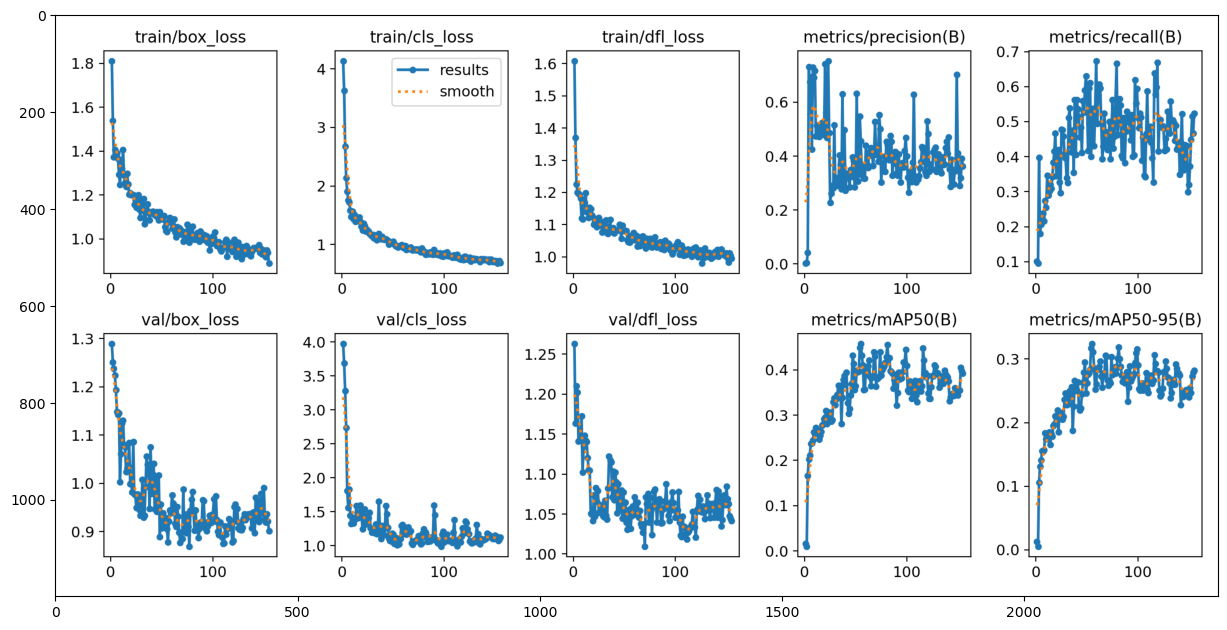

In [35]:
plt.figure(figsize=(15, 10))
results = img.imread(Path(save_dir, "results.png"))   
plt.imshow(results) 
plt.show()

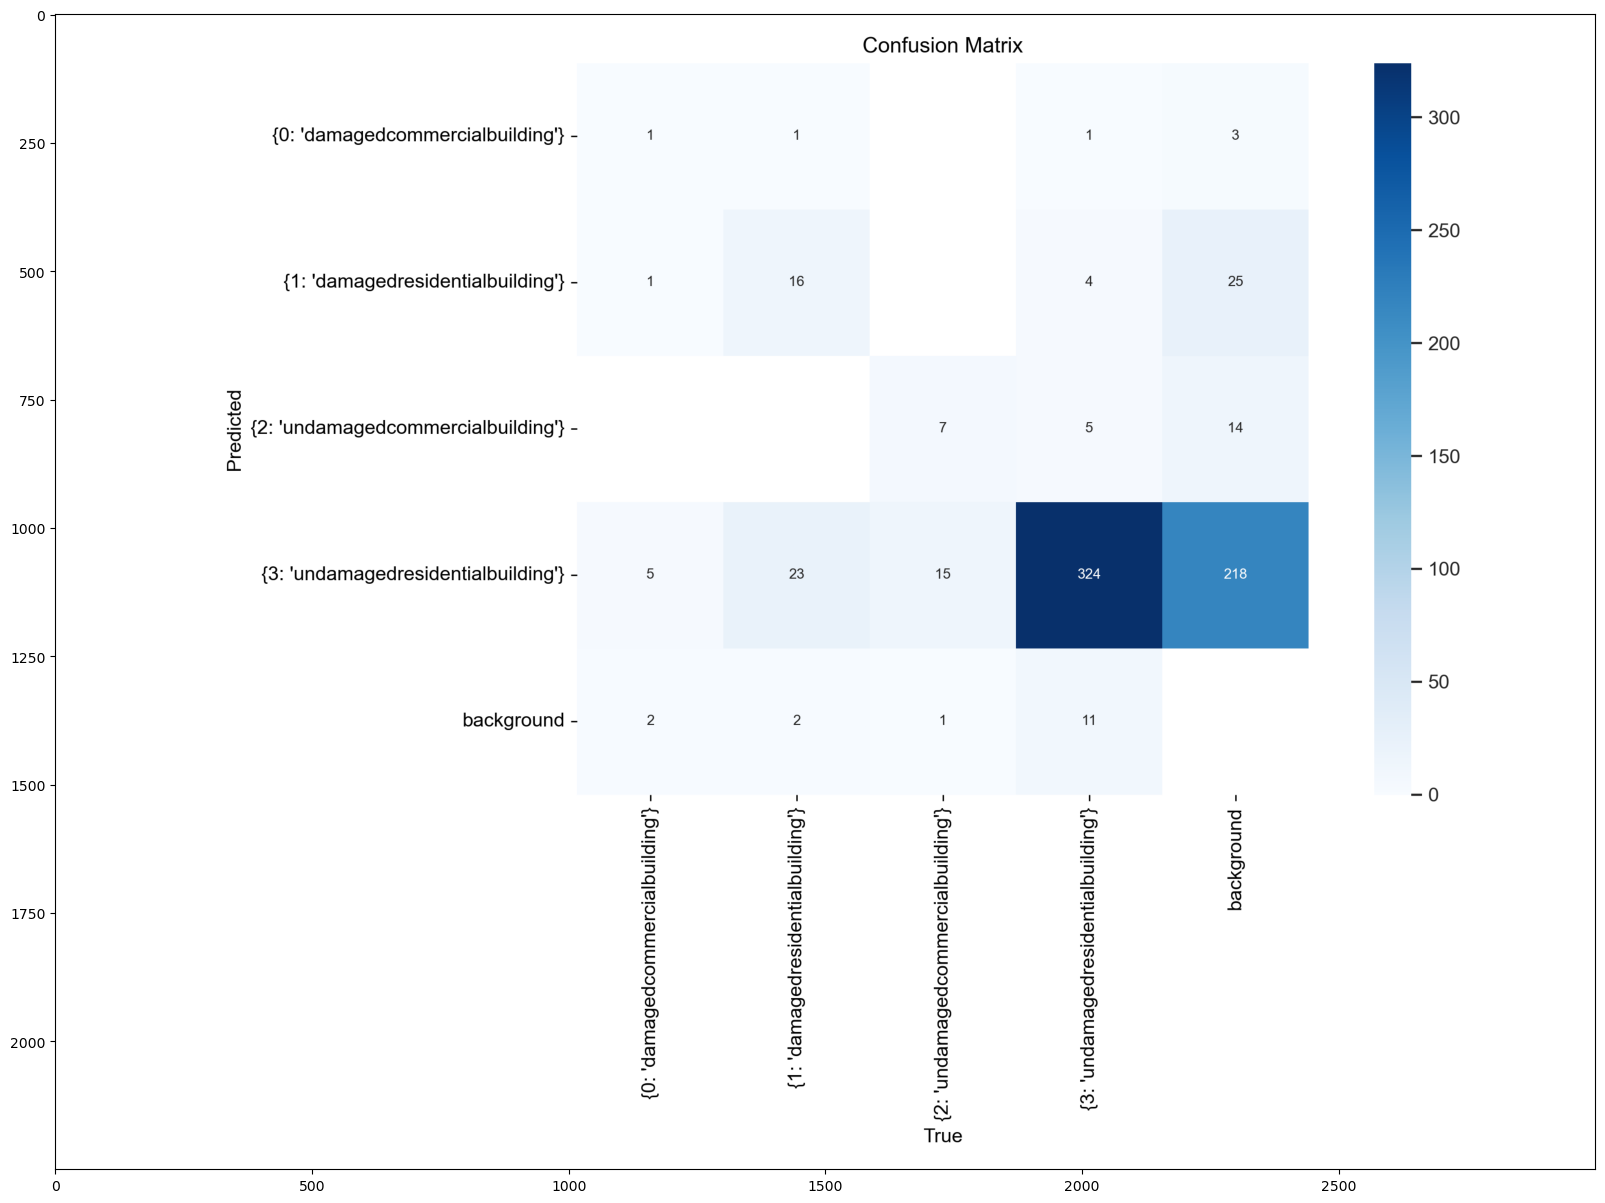

In [36]:
plt.figure(figsize=(20,15))  
# reading the image 
cf = img.imread(Path(save_dir, "confusion_matrix.png")) 
# displaying the image 
plt.imshow(cf) 
plt.show()

## Testing

In [13]:
results_dir = Path(save_dir, "submission_data"); os.makedirs(results_dir, exist_ok=True) # directory to store test output data
best_path = Path(save_dir, "weights/best.pt")

# Double-check with train_results.names
decoding_of_predictions = {0: 'damagedcommercialbuilding', 1: 'damagedresidentialbuilding', 2: 'undamagedcommercialbuilding', 3: 'undamagedresidentialbuilding'}

# Load the current best model
model = YOLO(best_path)

In [ ]:
test_results = model.val(
    split="test",
    imgsz=512,
    conf=0.25,
    iou=0.5,
    project=RUN_PATH,
)

In [6]:
test_results = model.predict(
    TEST_INPUTS_DIR,
    imgsz=512, iou=0.5, conf=0.25, 
    save=True, save_txt=True, project=RUN_PATH,
)


image 1/12 C:\Users\Jia Herng\Documents\Jia Herng Docs\projects\storm-damage-detection\datasets\storm-damage-detection\working\sdd\test\images\Validation_Post_Event_001_jpg.rf.816958fdf5bd6099b8a5e2b668d007e9.jpg: 512x512 9 {1: 'damagedresidentialbuilding'}s, 35 {3: 'undamagedresidentialbuilding'}s, 17.0ms
image 2/12 C:\Users\Jia Herng\Documents\Jia Herng Docs\projects\storm-damage-detection\datasets\storm-damage-detection\working\sdd\test\images\Validation_Post_Event_002_jpg.rf.23111ea1920da9b374c3919e1f423dcd.jpg: 512x512 8 {1: 'damagedresidentialbuilding'}s, 16 {3: 'undamagedresidentialbuilding'}s, 20.1ms
image 3/12 C:\Users\Jia Herng\Documents\Jia Herng Docs\projects\storm-damage-detection\datasets\storm-damage-detection\working\sdd\test\images\Validation_Post_Event_003_jpg.rf.6f70407de0a1ee2cd0f1c8008387e696.jpg: 512x512 7 {1: 'damagedresidentialbuilding'}s, 19 {3: 'undamagedresidentialbuilding'}s, 9.3ms
image 4/12 C:\Users\Jia Herng\Documents\Jia Herng Docs\projects\storm-damage

In [7]:
for r in test_results:
    confidences = r.boxes.conf.cpu().numpy().tolist()
    class_indices = r.boxes.cls.cpu().numpy().tolist()
    class_names = [decoding_of_predictions[int(clss_ix)] for clss_ix in class_indices]
    bounding_boxes = r.boxes.xyxy.cpu().numpy()

    # Check if bounding boxes, confidences and class names match
    if len(bounding_boxes) != len(confidences) or len(bounding_boxes) != len(class_names):
        print("Error: Number of bounding boxes, confidences, and class names should be the same.")
        continue
    
    text_file_name = os.path.splitext(os.path.basename(r.path))[0] # Get the img filename
    text_file_name = text_file_name.split(".")[0].rstrip("_jpg") # remove extra info in filename produced by roboflow

    # Creating a new .txt file for each image in the submission_directory
    with open(Path(results_dir, f"{text_file_name}.txt"), "w") as file:
        for i in range(len(bounding_boxes)):
            # Get coordinates of each bounding box
            left, top, right, bottom = bounding_boxes[i]
            # Write content to file in desired format
            file.write(f"{class_names[i]} {confidences[i]} {left} {top} {right} {bottom}\n")
    print("Output files generated successfully.")
    

Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.


In [8]:
# Define your source directory and the destination where the zip file will be created
destination_zip = Path(results_dir.parent, "submission")

print("source", results_dir)
print("dest", destination_zip)

# Create a zip file from the directory
shutil.make_archive(destination_zip, 'zip', results_dir)

print(f"Directory {results_dir} has been successfully zipped into {destination_zip}.")

source C:\Users\Jia Herng\Documents\Jia Herng Docs\projects\storm-damage-detection\runs\train4\submission_data
dest C:\Users\Jia Herng\Documents\Jia Herng Docs\projects\storm-damage-detection\runs\train4\submission
Directory C:\Users\Jia Herng\Documents\Jia Herng Docs\projects\storm-damage-detection\runs\train4\submission_data has been successfully zipped into C:\Users\Jia Herng\Documents\Jia Herng Docs\projects\storm-damage-detection\runs\train4\submission.
